# Model Performance

In [56]:
import pandas as pd
import numpy as np
from log_helpers import read_log_run, read_training_results
from data_helpers import get_region_list, get_dict_from_species_name_to_nb_of_samples, get_species_list

from utils import RunType
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
region_list = get_region_list()
log_root_dir = "logs"

def get_mean_test_auc_roc(run_type:RunType, logs_base_dir):
    df_regions_auc_roc = pd.DataFrame(columns=['auc_roc'])
    for region in region_list:
        df_region = read_log_run(run_type, region, logs_base_dir)['auc_roc'].to_frame()
        df_region_mean = df_region.mean().to_frame().T 
        df_region_mean.rename(index={0:region}, inplace=True)
        df_regions_auc_roc = pd.concat([df_regions_auc_roc, df_region_mean])
        
    final_mean = df_regions_auc_roc.mean()
    df_final_mean = pd.DataFrame([final_mean], columns=['auc_roc'], index=['avg'])
    df_regions_auc_roc = pd.concat([df_regions_auc_roc, df_final_mean])
    df_regions_auc_roc = df_regions_auc_roc.round(3)
    return df_regions_auc_roc


def to_latex_table_row_format(data: pd.DataFrame, column_name:str):
    latex_row = ""
    data_column = data[column_name]
    for val in data_column:
        latex_row = f"{latex_row} & {val}"
    return latex_row

def list_to_latex_table_row_format(data: list):
    latex_row = ""
    for val in data:
        latex_row = f"{latex_row} & {val}"
    return latex_row



## Single species

### Using the standard params

In [9]:
logs_dir_base_params = os.path.join(log_root_dir, "logs_standard_params")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.SINGLE_SPECIES_MLP, logs_dir_base_params)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.689 & 0.706 & 0.685 & 0.743 & 0.795 & 0.797 & 0.736


,auc_roc
AWT,0.689
CAN,0.706
NSW,0.685
NZ,0.743
SA,0.795
SWI,0.797
avg,0.736


### Using epoch=15 num_layers=2 and width=256 instead of respectively 30, 4, 512

In [13]:
logs_dir_lower_params = os.path.join(log_root_dir, "logs_lower_params")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.SINGLE_SPECIES_MLP, logs_dir_lower_params)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.727 & 0.717 & 0.709 & 0.749 & 0.8 & 0.837 & 0.757


,mean_test_auc_roc
AWT,0.727
CAN,0.717
NSW,0.709
NZ,0.749
SA,0.800
SWI,0.837
avg,0.757


### Optuna params

cross-val with train data

In [42]:
logs_dir_optuna_params = os.path.join(log_root_dir, "logs_optuna_params_train_val")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.SINGLE_SPECIES_MLP, logs_dir_optuna_params)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.685 & 0.706 & 0.699 & 0.726 & 0.779 & 0.831 & 0.738


,auc_roc
AWT,0.685
CAN,0.706
NSW,0.699
NZ,0.726
SA,0.779
SWI,0.831
avg,0.738


cross-val with test data, no blocked cv

In [43]:
logs_dir_optuna_params = os.path.join(log_root_dir, "logs_optuna_params_test_val")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.SINGLE_SPECIES_MLP, logs_dir_optuna_params)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.743 & 0.745 & 0.691 & 0.756 & 0.785 & 0.816 & 0.756


,auc_roc
AWT,0.743
CAN,0.745
NSW,0.691
NZ,0.756
SA,0.785
SWI,0.816
avg,0.756


cross-val with test data and blocked cv

In [44]:
logs_dir_optuna_params = os.path.join(log_root_dir, "logs_optuna_params_test_val_blocked_cv")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.SINGLE_SPECIES_MLP, logs_dir_optuna_params)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.712 & 0.707 & 0.692 & 0.725 & 0.787 & 0.8 & 0.737


,auc_roc
AWT,0.712
CAN,0.707
NSW,0.692
NZ,0.725
SA,0.787
SWI,0.800
avg,0.737


## Multi Species


### Standard params

In [13]:
logs_dir_base_params = os.path.join(log_root_dir, "logs_standard_params")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.MULTI_SPECIES_MLP, logs_dir_base_params)
mean_test_auc_roc

,auc_roc
AWT,0.694
CAN,0.686
NSW,0.632
NZ,0.651
SA,0.778
SWI,0.770
avg,0.702


### Lower params

In [15]:
logs_dir_lower_params_multi = os.path.join(log_root_dir, "logs_lower_params")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.MULTI_SPECIES_MLP, logs_dir_lower_params_multi)
mean_test_auc_roc

,mean_test_auc_roc
AWT,0.690
CAN,0.710
NSW,0.678
NZ,0.721
SA,0.756
SWI,0.838
avg,0.732


### Optuna params

cross-val with train data

In [29]:
logs_dir_optuna_params_multi = os.path.join(log_root_dir, "logs_optuna_params_train_val")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.MULTI_SPECIES_MLP, logs_dir_optuna_params_multi)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.723 & 0.694 & 0.702 & 0.731 & 0.793 & 0.829 & 0.745


,auc_roc
AWT,0.723
CAN,0.694
NSW,0.702
NZ,0.731
SA,0.793
SWI,0.829
avg,0.745


cross-val with test data, no blocked cv

In [5]:
logs_dir_optuna_params_multi = os.path.join(log_root_dir, "logs_optuna_params_test_val")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.MULTI_SPECIES_MLP, logs_dir_optuna_params_multi)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.719 & 0.702 & 0.725 & 0.742 & 0.79 & 0.832 & 0.752


,auc_roc
AWT,0.719
CAN,0.702
NSW,0.725
NZ,0.742
SA,0.790
SWI,0.832
avg,0.752


cross-val with test data and blocked cv

In [31]:
logs_dir_optuna_params_multi = os.path.join(log_root_dir, "logs_optuna_params_test_val_blocked_cv")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.MULTI_SPECIES_MLP, logs_dir_optuna_params_multi)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.718 & 0.707 & 0.725 & 0.739 & 0.758 & 0.833 & 0.747


,auc_roc
AWT,0.718
CAN,0.707
NSW,0.725
NZ,0.739
SA,0.758
SWI,0.833
avg,0.747


## Transfer learning

### fine tuning the whole model

In [16]:
# logs_dir_transfer_learning_whole_model = os.path.join(log_root_dir, "logs_transfer_learning_whole_model")
# mean_test_auc_roc = get_mean_test_auc_roc(RunType.TRANSFER_LEARNING, logs_dir_transfer_learning_whole_model)
# print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
# mean_test_auc_roc

### fine-tuning only the last layer

In [ ]:
logs_dir_transfer_learning_last_layer_only = os.path.join(log_root_dir, "logs_transfer_learning_last_layer_only_from_standard_base")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.TRANSFER_LEARNING, logs_dir_transfer_learning_last_layer_only)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

### fine-tuning only the last layer but for 30 epochs instead of 15

In [18]:
logs_dir_transfer_learning_last_layer_only_30 = os.path.join(log_root_dir, "logs_transfer_learning_last_layer_only_30epochs_from_standard_base")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.TRANSFER_LEARNING, logs_dir_transfer_learning_last_layer_only_30)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.651 & 0.689 & 0.642 & 0.656 & 0.741 & 0.836 & 0.703


,mean_test_auc_roc
AWT,0.651
CAN,0.689
NSW,0.642
NZ,0.656
SA,0.741
SWI,0.836
avg,0.703


### fine-tuning only the last layer but using a base model with the lower parameters

In [19]:
logs_dir_transfer_learning_last_layer_only_lower_params = os.path.join(log_root_dir, "logs_transfer_learning_last_layer_only_from_lower_base")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.TRANSFER_LEARNING, logs_dir_transfer_learning_last_layer_only_lower_params)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.646 & 0.63 & 0.572 & 0.591 & 0.696 & 0.831 & 0.661


,mean_test_auc_roc
AWT,0.646
CAN,0.630
NSW,0.572
NZ,0.591
SA,0.696
SWI,0.831
avg,0.661


### Optuna params

cross-val with train data

In [15]:
logs_dir_transfer_learning_optuna = os.path.join(log_root_dir, "logs_optuna_params_train_val")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.TRANSFER_LEARNING, logs_dir_transfer_learning_optuna)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.693 & 0.701 & 0.711 & 0.725 & 0.786 & 0.831 & 0.741


,auc_roc
AWT,0.693
CAN,0.701
NSW,0.711
NZ,0.725
SA,0.786
SWI,0.831
avg,0.741


cross-val with test data, no blocked cv

In [16]:
logs_dir_transfer_learning_optuna = os.path.join(log_root_dir, "logs_optuna_params_test_val")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.TRANSFER_LEARNING, logs_dir_transfer_learning_optuna)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.73 & 0.729 & 0.729 & 0.77 & 0.782 & 0.824 & 0.761


,auc_roc
AWT,0.730
CAN,0.729
NSW,0.729
NZ,0.770
SA,0.782
SWI,0.824
avg,0.761


cross-val with test data and blocked cv

In [5]:
logs_dir_transfer_learning_optuna = os.path.join(log_root_dir, "logs_optuna_params_test_val_blocked_cv")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.TRANSFER_LEARNING, logs_dir_transfer_learning_optuna)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.694 & 0.697 & 0.709 & 0.732 & 0.764 & 0.814 & 0.735


,auc_roc
AWT,0.694
CAN,0.697
NSW,0.709
NZ,0.732
SA,0.764
SWI,0.814
avg,0.735


# MAML

### Standard Params

In [14]:
logs_dir_maml = os.path.join(log_root_dir, "logs_maml")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.MAML, logs_dir_maml)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.701 & 0.697 & 0.661 & 0.73 & 0.768 & 0.81 & 0.728


,auc_roc
AWT,0.701
CAN,0.697
NSW,0.661
NZ,0.730
SA,0.768
SWI,0.810
avg,0.728


### Optuna Params

cross-val with train data

In [46]:
logs_dir_maml = os.path.join(log_root_dir, "logs_optuna_params_train_val")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.MAML, logs_dir_maml)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.691 & 0.707 & 0.695 & 0.721 & 0.774 & 0.829 & 0.736


,auc_roc
AWT,0.691
CAN,0.707
NSW,0.695
NZ,0.721
SA,0.774
SWI,0.829
avg,0.736


cross-val with test data, no blocked cv

In [47]:
logs_dir_maml = os.path.join(log_root_dir, "logs_optuna_params_test_val")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.MAML, logs_dir_maml)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.721 & 0.708 & 0.7 & 0.747 & 0.776 & 0.815 & 0.745


,auc_roc
AWT,0.721
CAN,0.708
NSW,0.700
NZ,0.747
SA,0.776
SWI,0.815
avg,0.745


cross-val with test and and blocked cv

In [48]:
logs_dir_maml = os.path.join(log_root_dir, "logs_optuna_params_test_val_blocked_cv")
mean_test_auc_roc = get_mean_test_auc_roc(RunType.MAML, logs_dir_maml)
print(to_latex_table_row_format(mean_test_auc_roc, "auc_roc"))
mean_test_auc_roc

 & 0.714 & 0.691 & 0.689 & 0.723 & 0.788 & 0.809 & 0.736


,auc_roc
AWT,0.714
CAN,0.691
NSW,0.689
NZ,0.723
SA,0.788
SWI,0.809
avg,0.736


# Visual comparisons

### Compare the different methods using optuna params

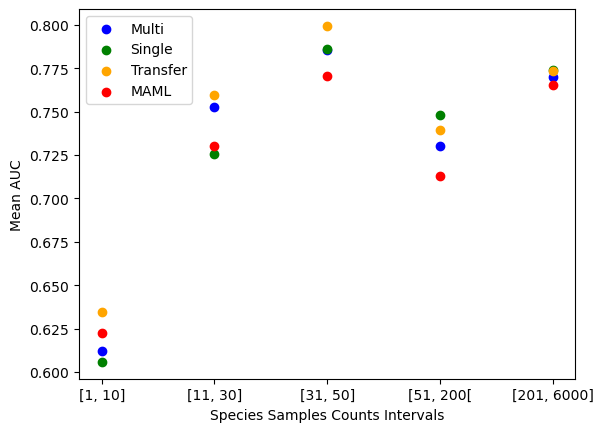

In [88]:


def get_arrays_for_plotting(run_type:RunType, logs_dir):
    auc_rocs = []
    species_all = []
    species_samples_count = []
    run_types = []

    region_list = get_region_list()
    for region in region_list:
        region_auc_rocs = read_log_run(run_type, region, logs_dir)['auc_roc'].to_dict()
        region_species_samples_count = get_dict_from_species_name_to_nb_of_samples(region)
        for species in region_auc_rocs.keys():
            auc_rocs.append(region_auc_rocs[species])
            species_samples_count.append(region_species_samples_count[species])
            species_all.append(species)
            run_types.append(run_type)
    return auc_rocs, species_all, species_samples_count, run_types


optuna_log_path = "logs_optuna_params_test_val"
logs_dir = os.path.join(log_root_dir, optuna_log_path)

auc_rocs_multi, species_multi, region_species_samples_count_multi, run_types_multi = get_arrays_for_plotting(RunType.MULTI_SPECIES_MLP, logs_dir)
auc_rocs_single, species_single, region_species_samples_count_single, run_types_single = get_arrays_for_plotting(RunType.SINGLE_SPECIES_MLP, logs_dir)
auc_rocs_transfer, species_transfer, region_species_samples_count_transfer, run_types_transfer = get_arrays_for_plotting(RunType.TRANSFER_LEARNING, logs_dir)
auc_rocs_maml, species_maml, region_species_samples_count_maml, run_types_maml = get_arrays_for_plotting(RunType.MAML, logs_dir)







def plot_histogram(auc_rocs, species_counts, category_label, color):
    intervals = [(2, 10), (10, 30), (30, 50), (50, 200), (200, 6000)]

    # Initialize lists to store mean AUC values for each interval
    mean_auc_values = []

    auc_rocs = np.array(auc_rocs)
    species_counts = np.array(species_counts)
    category_label = np.array(category_label)
    

    for interval in intervals:
        lower_bound, upper_bound = interval

        # Filter AUC values within the current interval
        mask = np.logical_and(species_counts >= lower_bound, species_counts <= upper_bound)
        auc_values_in_interval = auc_rocs[mask]

        mean_auc = np.mean(auc_values_in_interval)
        mean_auc_values.append(mean_auc)

    plt.scatter(range(len(intervals)), mean_auc_values, color=color, label=category_label, marker='o')


plot_histogram(auc_rocs_multi, region_species_samples_count_multi, 'Multi', color='blue')
plot_histogram(auc_rocs_single, region_species_samples_count_single, 'Single', color='green')
plot_histogram(auc_rocs_transfer, region_species_samples_count_transfer, 'Transfer', color='orange')
plot_histogram(auc_rocs_maml, region_species_samples_count_maml, 'MAML', color='red')

plt.xlabel('Species Samples Counts Intervals')
plt.xticks(range(len([(1, 10), (11, 30), (31, 50), (51, 200), (201, 6000)])),
           [interval for interval in ["[1, 10]", "[11, 30]", "[31, 50]", "[51, 200[", "[201, 6000]"]])

plt.ylabel('Mean AUC')

plt.legend()

plt.show()


# Visualization of the evolution of test and validation performance during training

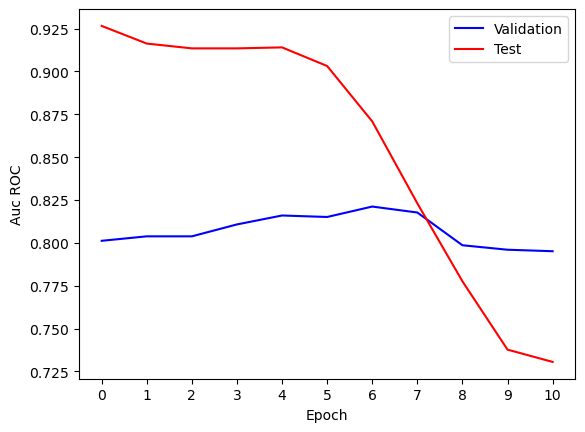

In [29]:


run_type = RunType.TRANSFER_LEARNING
log_top_level_dir = os.path.join("training_val_and_test_results", "logs", "logs_optuna_params_train_val")
region = "AWT"

region_species = get_species_list(region)
species_idx = 1
species = region_species[species_idx]

training_results_val = read_training_results(run_type, log_top_level_dir, region, species, "val")
training_results_test = read_training_results(run_type, log_top_level_dir, region, species, "test")

# Create a figure and axis
fig, ax = plt.subplots()

# Plot points for training_results_val
x_labels = range(len(training_results_val)) if run_type==RunType.TRANSFER_LEARNING else range(1, len(training_results_val)+1)
ax.plot(x_labels, training_results_val, label='Validation', color='blue')

# Plot points for training_results_test
ax.plot(x_labels, training_results_test, label='Test', color='red')

# Set integer ticks on the x-axis
ax.set_xticks(range(len(training_results_val)))

# Set labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Auc ROC')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [98]:
# Get the correlation score of the curves based on if train, test, or blocked test

def is_array_not_constant(arr):
    # Check if the standard deviation is greater than 0
    return np.std(arr) > 1e-5

run_type = RunType.TRANSFER_LEARNING
log_top_level_dir = os.path.join("training_val_and_test_results", "logs", "logs_optuna_params_test_val")

regions_mean_correlation_scores = []

for region in get_region_list():

    region_correlation_scores = []

    region = get_region_list()[4]

    region_species = get_species_list(region)

    for species in region_species:

        

        training_results_val = read_training_results(run_type, log_top_level_dir, region, species, "val")
        training_results_test = read_training_results(run_type, log_top_level_dir, region, species, "test")

        if not np.isnan(training_results_val).any() and not np.isnan(training_results_test).any():
            # correlation not defined for constant array
            # if is_array_not_constant(training_results_val) and is_array_not_constant(training_results_test):
            region_correlation_scores.append(pearsonr(training_results_val, training_results_test).statistic)

    regions_mean_correlation_scores.append(np.nanmean(region_correlation_scores).round(3))

# add the mean of all regions
regions_mean_correlation_scores.append(np.mean(regions_mean_correlation_scores).round(3))

print(list_to_latex_table_row_format(regions_mean_correlation_scores))



 & 0.079 & 0.079 & 0.079 & 0.079 & 0.079 & 0.079 & 0.079


# Visualization of the evolution of maml's performance on some species based on the number of its samples we let it use

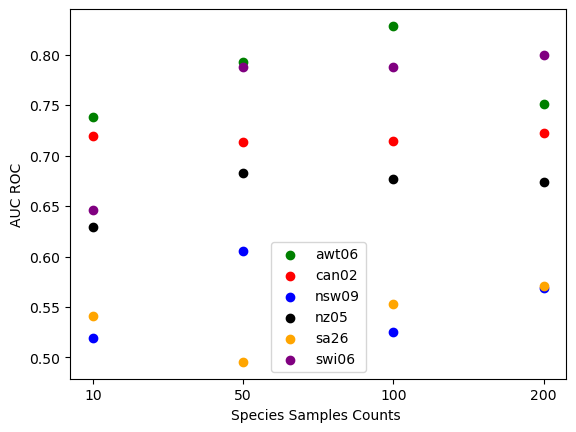

In [49]:
regions = get_region_list()
run_type = RunType.MAML

species = ["awt06", "can02", "nsw09", "nz05", "sa26", "swi06"]
num_samples = ["10", "50", "100", "200"]

performance_10_samples = []
performance_50_samples = []
performance_100_samples = []
performance_200_samples = []

logs_dir_10_samples = []
logs_dir_50_samples = []
logs_dir_100_samples = []
logs_dir_200_samples = []

awt_log_dir = []
can_log_dir = []
nsw_log_dir = []
nz_log_dir = []
sa_log_dir = []
swi_log_dir = []

for i in range(len(num_samples)):
    awt_log_dir.append(os.path.join(log_root_dir, f"logs_maml_evolution_{num_samples[i]}_samples", species[0]))
    can_log_dir.append(os.path.join(log_root_dir, f"logs_maml_evolution_{num_samples[i]}_samples", species[1]))
    nsw_log_dir.append(os.path.join(log_root_dir, f"logs_maml_evolution_{num_samples[i]}_samples", species[2]))
    nz_log_dir.append(os.path.join(log_root_dir, f"logs_maml_evolution_{num_samples[i]}_samples", species[3]))
    sa_log_dir.append(os.path.join(log_root_dir, f"logs_maml_evolution_{num_samples[i]}_samples", species[4]))
    swi_log_dir.append(os.path.join(log_root_dir, f"logs_maml_evolution_{num_samples[i]}_samples", species[5]))
    
awt_results = []
can_results = []
nsw_results = []
nz_results = []
sa_results = []
swi_results = []

for i in range(len(num_samples)):
    awt_results.append(read_log_run(run_type, regions[0], awt_log_dir[i])['auc_roc'][0])
    can_results.append(read_log_run(run_type, regions[1], can_log_dir[i])['auc_roc'][0])
    nsw_results.append(read_log_run(run_type, regions[2], nsw_log_dir[i])['auc_roc'][0])
    nz_results.append(read_log_run(run_type, regions[3], nz_log_dir[i])['auc_roc'][0])
    sa_results.append(read_log_run(run_type, regions[4], sa_log_dir[i])['auc_roc'][0])
    swi_results.append(read_log_run(run_type, regions[5], swi_log_dir[i])['auc_roc'][0])

all_results = [awt_results, can_results, nsw_results, nz_results, sa_results, swi_results]
all_colors = ["green", "red", "blue", "black", "orange", "purple"]

for i in range(len(all_results)):
    plt.scatter(range(len(num_samples)), all_results[i], color=all_colors[i], label=species[i], marker='o')

plt.xlabel('Species Samples Counts ')
plt.xticks(range(len(num_samples)), num_samples)

plt.ylabel('AUC ROC')

plt.legend()

plt.show()

## Get average number of epochs necessary for different methods

In [78]:

run_type = RunType.SINGLE_SPECIES_MLP    
log_top_level_dir = os.path.join("training_val_and_test_results", "logs", "logs_optuna_params_test_val")

region_list = get_region_list()

early_stop_patience = 3
extra_epochs_after_best_params = early_stop_patience + 1

total_epochs = 0
total_species = 0

all_regions_std_epochs = []
all_regions_mean_epochs = []

for region in region_list:

    region_species = get_species_list(region)
    region_epochs = []

    for species in region_species:
    
        training_results_test = read_training_results(run_type, log_top_level_dir, region, species, "test")
        epochs_till_best_params = len(training_results_test) - extra_epochs_after_best_params
        total_epochs += epochs_till_best_params
        total_species += 1

        region_epochs.append(epochs_till_best_params)

    all_regions_std_epochs.append(np.std(region_epochs))
    all_regions_mean_epochs.append(np.mean(region_epochs))

print(list_to_latex_table_row_format(np.round(all_regions_mean_epochs, 3)))
print(list_to_latex_table_row_format(np.round(all_regions_std_epochs, 3)))


 & 3.475 & 4.35 & 8.056 & 7.442 & 6.2 & 8.633
 & 2.646 & 2.242 & 7.529 & 6.809 & 7.087 & 6.725


In [108]:
run_type = RunType.SINGLE_SPECIES_MLP    
log_top_level_dir = os.path.join("training_val_and_test_results", "logs", "logs_optuna_params_test_val")

region_list = get_region_list()

early_stop_patience = 3
extra_epochs_after_best_params = early_stop_patience + 1
max_epochs_allowed = 30

total_epochs = 0
total_species = 0

all_regions_std = []
all_regions_intervals_epochs = []

intervals = [(2, 10), (10, 30), (30, 50), (50, 200), (200, 6000)]

interval_0 = []
interval_1 = []
interval_2 = []
interval_3 = []
interval_4 = []
all_intervals = []
all_intervals.append(interval_0)
all_intervals.append(interval_1)
all_intervals.append(interval_2)
all_intervals.append(interval_3)
all_intervals.append(interval_4)

for region in region_list:

    region_species_samples_count = get_dict_from_species_name_to_nb_of_samples(region)

    region_species = get_species_list(region)
    region_epochs = []

    
    
    for species in region_species:
    
        training_results_test = read_training_results(run_type, log_top_level_dir, region, species, "test")
        epochs_till_best_params = len(training_results_test)
        if epochs_till_best_params != max_epochs_allowed:
            epochs_till_best_params -= extra_epochs_after_best_params
        total_epochs += epochs_till_best_params
        total_species += 1

        region_epochs.append(epochs_till_best_params)

        species_samples_count = region_species_samples_count[species]
        for i, interval in enumerate(intervals):
            lower_bound, upper_bound = interval
            if species_samples_count >= lower_bound and species_samples_count < upper_bound:
                all_intervals[i].append(epochs_till_best_params)
    
    all_regions_std.append(np.std(region_epochs))
    all_regions_intervals_epochs.append(all_intervals)

print(total_epochs / total_species)
print(list_to_latex_table_row_format(np.round(all_regions_std, 3)))
print(all_regions_intervals_epochs[0])
print(all_regions_intervals_epochs[1])
print(all_regions_intervals_epochs[2])
print(all_regions_intervals_epochs[3])
print(all_regions_intervals_epochs[4])






6.81858407079646
 & 2.646 & 2.242 & 8.445 & 7.257 & 8.216 & 7.449
[[2, 25, 8, 30, 2, 10, 3, 16, 1], [9, 2, 1, 3, 2, 8, 1, 1, 2, 6, 3, 16, 2, 2, 10, 1, 30, 1, 30, 7, 1, 10, 4, 2, 10, 2, 30, 1, 7, 3, 1, 1, 2, 2, 6, 1, 2, 1, 1, 6, 17, 1, 17, 13, 10, 16, 14, 30, 8, 1, 30, 9, 3], [1, 10, 1, 1, 1, 3, 1, 7, 6, 1, 4, 9, 3, 2, 13, 2, 10, 3, 1, 9, 12, 13, 1, 21, 9, 10, 7, 25, 6, 5, 4, 6, 2, 1, 3, 6, 30, 2, 1, 1, 5, 3, 1, 1], [6, 3, 8, 5, 3, 10, 2, 2, 2, 1, 3, 3, 4, 8, 1, 4, 1, 4, 1, 5, 2, 9, 7, 7, 4, 11, 2, 13, 4, 4, 30, 8, 3, 7, 7, 17, 5, 2, 1, 1, 6, 7, 12, 2, 4, 13, 4, 6, 3, 3, 30, 10, 2, 9, 2, 8, 1, 30, 2, 4, 1, 7, 9, 4, 1, 1, 5, 6, 8, 8, 5, 8, 10], [1, 3, 4, 5, 4, 5, 7, 2, 5, 4, 5, 3, 4, 2, 1, 6, 3, 9, 8, 1, 2, 5, 2, 7, 8, 8, 3, 4, 15, 30, 30, 2, 8, 6, 7, 1, 15, 9, 16, 18, 5, 13, 10, 3, 16, 2, 4]]
[[2, 25, 8, 30, 2, 10, 3, 16, 1], [9, 2, 1, 3, 2, 8, 1, 1, 2, 6, 3, 16, 2, 2, 10, 1, 30, 1, 30, 7, 1, 10, 4, 2, 10, 2, 30, 1, 7, 3, 1, 1, 2, 2, 6, 1, 2, 1, 1, 6, 17, 1, 17, 13, 10, 16, 14, 30, 8, 1

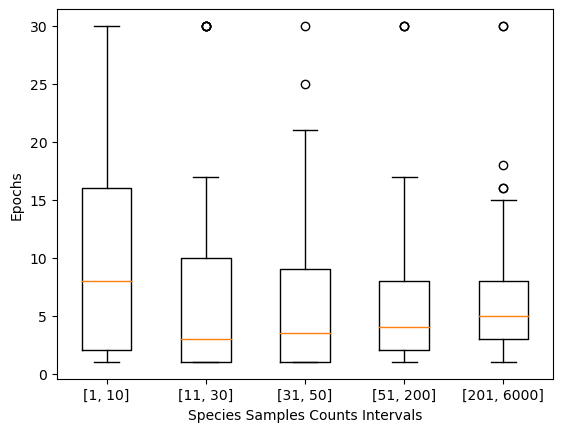

In [107]:
# Creating a boxplot
plt.boxplot(all_intervals, labels=[interval for interval in ["[1, 10]", "[11, 30]", "[31, 50]", "[51, 200]", "[201, 6000]"]])

# Boxplot of the number of epochs needed to reach local optimum for each region with the single-species method, PA validation

# Adding title and labels
plt.xlabel('Species Samples Counts Intervals')
plt.ylabel('Epochs')

# Display the plot
plt.show()
